# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.
There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water.

### Step 1. Open the data file and study the general information.

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t') 

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 #### Data Description
- airports_nearest — distance to the nearest airport in meters (m);
- balcony — number of balconies;
- ceiling_height — ceiling height (m);
- cityCenters_nearest — distance to the city center (m);
- days_exposition — how many days the ad was posted (from publication to withdrawal);
- first_day_exposition — publication date;
- floor;
- floors_total — total floors in the house;
- is_apartment — apartments (boolean type);
- kitchen_area — kitchen area in square meters (m²);
- last_price — price at the time of withdrawal from publication;
- living_area — living area in square meters (m²);
- locality_name — name of the settlement;
- open_plan — free layout (boolean type);
- parks_around3000 — the number of parks within a radius of 3 km;
- parks_nearest — distance to the nearest park (m);
- ponds_around3000 — the number of reservoirs within a radius of 3 km;
- ponds_nearest — distance to the nearest body of water (m);
- rooms — number of rooms;
- studio — studio apartment (boolean type);
- total_area — apartment area in square meters (m²);
- total_images — the number of photos of the apartment in the ad.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.isnull().sum()  

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Conclusion

Enough values ​​are missing and requires:

- ceiling height
- number of floors
- living area
- kitchen area
- balcony
- locality_name
- cityCenters_nearest
- airports_nearest
- days_exposition 

Some data does not need to be replaced, because will not be analyzed in the evaluation (for example, apartments, take a boolean value in the evaluation is not so important). For now we will make replacements for the most important values.


### Step 2. Data preprocessing

### Defining and filling in missing values 

In [6]:
df.loc[df['ceiling_height'].isnull(), 'floors_total'].value_counts()

5.0     2122
9.0     1204
25.0     552
16.0     511
12.0     509
10.0     424
4.0      411
17.0     330
6.0      295
3.0      269
24.0     252
18.0     230
14.0     210
19.0     205
7.0      194
8.0      170
2.0      168
23.0     156
22.0     145
15.0     140
20.0     115
13.0     112
11.0      94
21.0      93
27.0      92
26.0      70
35.0      16
1.0       15
28.0      12
33.0       1
36.0       1
Name: floors_total, dtype: int64

Let's fill  missing values in ceiling_height column by median values floors_total column's values.

In [7]:
df['ceiling_height'] = df.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(x.median()))
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [8]:
df['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

In [9]:
print('Пропущено {:.1%}'. format(df['floors_total'].isna().value_counts()[1] / len(df)))

Пропущено 0.4%


Filled near 0,4% values. We could drop them, but lets's fill them by median values.  

In [10]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

In [11]:
df['floors_total'].isna().value_counts()

False    23699
Name: floors_total, dtype: int64

In [12]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.55,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.66,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [13]:
df['kitchen_area'].isnull().sum()

2278

In [14]:
df['living_area'].isnull().sum()

1903

In [15]:
df[df['total_area'] < df['living_area'] + df['kitchen_area']]['kitchen_area'].count()

64

We have 64 values, where the total area is less than the sum between the kitchen and living area. We don't know why, it might be a bug, but since this is a small piece of data, we can remove these values.

In [16]:
df.drop(df[df['total_area'] < df['living_area'] + df['kitchen_area']].index, inplace=True)

##### There are still missing values for the kitchen_area and living_area columns. We can fill them in based on the total area of the apartment and calculate the approximate area of the living area and kitchen: calculate the ratio of the total area to the living area and kitchen, calculate the median, and based on this data, fill in the missing values.

In [17]:
kitchen_ratio_med = (df['kitchen_area']/df['total_area']).median()

In [18]:
df['kitchen_area'] = round(df['kitchen_area'].fillna(df['total_area']*kitchen_ratio_med),1)

In [19]:
living_ratio_med = (df['living_area']/df['total_area']).median()

In [20]:
df['living_area'] = round(df['living_area'].fillna(df['total_area']*living_ratio_med),1)

In [21]:
df['balcony'].isnull().sum()

11499

In [22]:
df['balcony'] = df['balcony'].fillna(0)

In [23]:
df['balcony'].isna().value_counts()

False    23635
Name: balcony, dtype: int64

In [24]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15682
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             395
Пушкин                 369
Колпино                337
посёлок Парголово      326
Гатчина                303
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [25]:
df[(df['locality_name'].isnull())][['locality_name', 'cityCenters_nearest']].head()

,locality_name,cityCenters_nearest
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0


In [26]:
df['locality_name'].isnull().sum()

49

In [27]:
df.loc[(df['locality_name'].isnull()) & (df['cityCenters_nearest'] < 17000),   
'locality_name'] = df.loc[(df['locality_name'].isnull()) & (df['cityCenters_nearest'] < 17000),    
'locality_name'].fillna('Санкт-Петербург')

In [28]:
df.dropna(subset = ['locality_name'], inplace = True)

In [29]:
df['cityCenters_nearest'].isnull().sum()

5491

In [30]:
df['airports_nearest'].isnull().sum()

5514

In [31]:
df.loc[df['airports_nearest'].isnull(), 'locality_name'].value_counts()

посёлок Мурино                                       520
Всеволожск                                           395
Гатчина                                              303
деревня Кудрово                                      299
Выборг                                               237
                                                    ... 
поселок Коробицыно                                     1
садовое товарищество Рахья                             1
поселок Пансионат Зелёный Бор                          1
поселок Севастьяново                                   1
посёлок при железнодорожной станции Приветнинское      1
Name: locality_name, Length: 344, dtype: int64

In [32]:
df.loc[df['cityCenters_nearest'].isnull(), 'locality_name'].value_counts()

посёлок Мурино                                       520
Всеволожск                                           395
Гатчина                                              303
деревня Кудрово                                      299
Выборг                                               237
                                                    ... 
поселок Коробицыно                                     1
садовое товарищество Рахья                             1
поселок Севастьяново                                   1
деревня Иссад                                          1
посёлок при железнодорожной станции Приветнинское      1
Name: locality_name, Length: 345, dtype: int64

Заполним пропущенные значения в столбцах медианным значением по столбцу locality_name, т.к. медиана менее чувствительна к выбросам.

In [33]:
cityCenters_nearest_median = df.groupby('locality_name')['cityCenters_nearest'].median()

In [34]:
df['cityCenters_nearest'] = df.groupby('locality_name')['cityCenters_nearest'].apply(lambda x: x.fillna(x.median()))
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())

In [35]:
airports_nearest_median = df.groupby('locality_name')['airports_nearest'].median()

In [36]:
df['airports_nearest'] = df.groupby('locality_name')['airports_nearest'].apply(lambda x: x.fillna(x.median()))
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())

In [37]:
df['days_exposition'].isnull().sum() 

3172

In [38]:
df.groupby('days_exposition')['days_exposition'].count().sort_values(ascending=False).head()

days_exposition
45.0    877
60.0    534
7.0     229
30.0    208
90.0    203
Name: days_exposition, dtype: int64

In [39]:
df['days_exposition'].describe()

count    20443.000000
mean       180.965954
std        219.846450
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

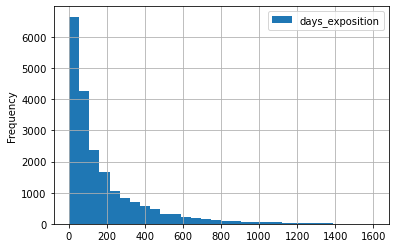

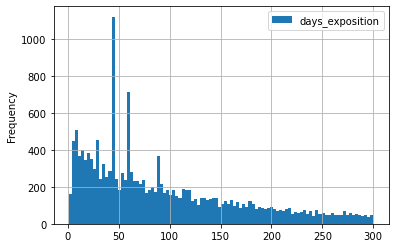

In [40]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))

The average is 180, the median is 95. On the histogram and count method, we see that we have peaks at 45,60,7,30 and 90 days. According to Yandex rules, this is the number of days for ads to be automatically closed. But we do not know if the owner closed the ad himself (sold the apartment, changed his mind, etc.) or the ad was closed due to the limitation period, so we cannot replace the data with the median because this will lead to severe data corruption.

###  Changing data types

In [41]:
print(df.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


Переведем значения типа float к типу данных int. Для этого нужно заполнить пустые значения. Могу предположить, что пустые значения парков и прудов означают их отсутствие. Можем заменить пропуски на 0. Также приведем цену к рублям и переведем в тысячи, чтобы избавиться от нулей. Формат столбца first_day_exposition меняем на datetime.

In [42]:
df['floors_total'] = df['floors_total'].astype('int')
df['last_price'] = df['last_price'].astype('int')/1000
df['floor'] = df['floor'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')
df['parks_nearest'] = df['parks_nearest'].fillna(0).astype('int')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')
df['ponds_nearest'] = df['ponds_nearest'].fillna(0).astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [43]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863,16028,1.0,482,2,755,NaN
1,7,3350.0,40.40,2018-12-04,1,2.75,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817,18603,0.0,0,0,0,81.0
2,10,5196.0,56.00,2015-08-20,2,2.55,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741,13933,1.0,90,2,574,558.0
3,0,64900.0,159.00,2015-07-24,3,2.60,14,90.2,9,NaN,...,27.4,0,Санкт-Петербург,28098,6800,2.0,84,3,234,424.0
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856,8098,2.0,112,1,48,121.0
5,10,2890.0,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,9.1,0,городской посёлок Янино-1,26736,13092,NaN,0,0,0,55.0
6,6,3700.0,37.30,2017-11-02,1,2.66,26,10.6,6,NaN,...,14.4,1,посёлок Парголово,52996,19143,0.0,0,0,0,155.0
7,5,7915.0,71.60,2019-04-18,2,2.75,24,40.6,22,NaN,...,18.9,2,Санкт-Петербург,23982,11634,0.0,0,0,0,NaN
8,20,2900.0,33.16,2018-05-23,1,2.70,27,15.4,26,NaN,...,8.8,0,посёлок Мурино,26736,13092,NaN,0,0,0,189.0
9,18,5400.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.5,2,Санкт-Петербург,50898,15008,0.0,0,0,0,289.0


In [44]:
df.duplicated().sum()

0

### Step 3. Make calculations and add them to the table

In this section, we will calculate the following values:

- price per square meter;
- day of the week, month and year of publication of the ad;
- apartment floor; options - first, last, other;
- the ratio of living and total area, as well as the ratio of kitchen area to total.

In [45]:
df['price_sqm'] =  (df['last_price'] / df['total_area']).round(2)

In [46]:
df['weekday_exposition'] = df['first_day_exposition'].apply(lambda x: x.isoweekday())
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month 
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [47]:
dict_weekdays = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда', 4: '4 - четверг', 
                    5: '5 - пятница', 6: '6 - суббота', 7: '7 - воскресенье'}

In [48]:
df['weekday_exposition'] = df['weekday_exposition'].map(dict_weekdays)

In [49]:
df['floor_entity'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['floor_entity'] = np.where(df['floor'] == df['floors_total'], 'последний', df['floor_entity'])

In [50]:
df['living_area_ratio'] = df['living_area'] / df['total_area'] 
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

### Step 4. Conduct exploratory data analysis and follow the instructions below:

In [51]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23615.000000,23615.000000,23615.000000,23615.000000
mean,60.374108,6546.833038,2.071776,2.733531
std,35.687869,10904.732842,1.079215,0.970039
min,12.000000,12.190000,0.000000,1.000000
25%,40.000000,3407.000000,1.000000,2.550000
50%,52.000000,4650.000000,2.000000,2.650000
75%,69.900000,6800.000000,3.000000,2.750000
max,900.000000,763000.000000,19.000000,100.000000


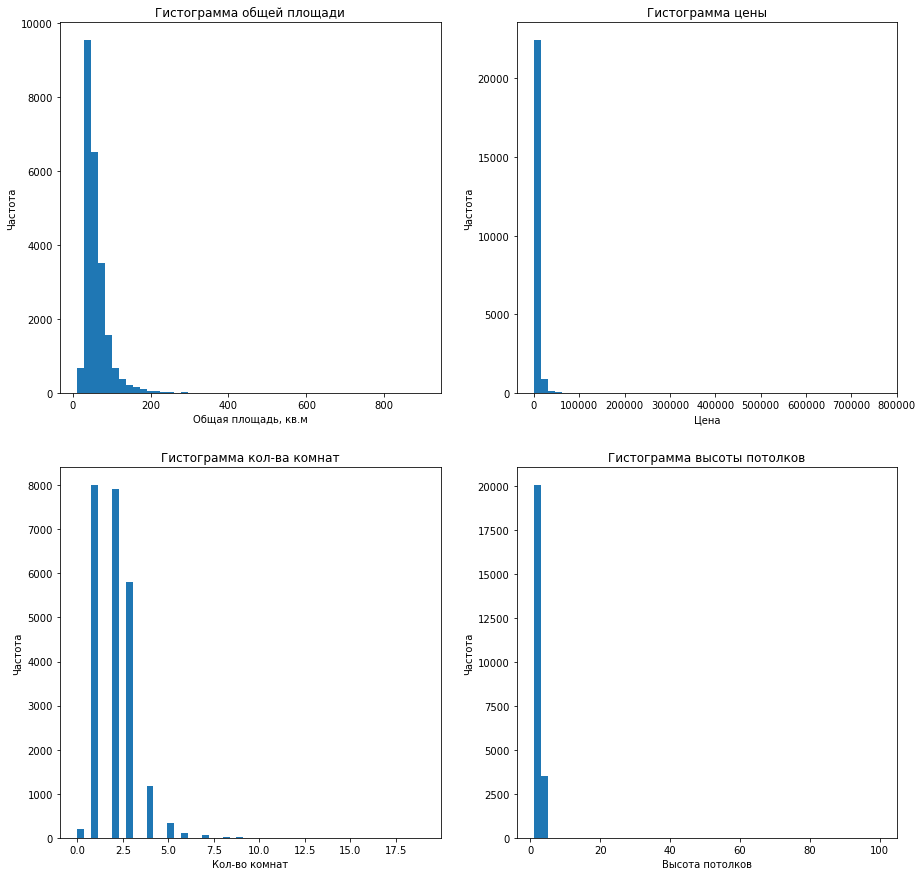

In [52]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
title = ['Гистограмма общей площади', 'Гистограмма цены', 'Гистограмма кол-ва комнат', 'Гистограмма высоты потолков'] 
set_xlabel = ['Общая площадь, кв.м', 'Цена', 'Кол-во комнат', 'Высота потолков']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
for i in range (len(columns)):
    ax_i = df[columns[i]].plot(kind='hist', ax=ax[i//2, (i)%2], bins=50, title=title[i])
    ax_i.set_ylabel('Частота')
    ax_i.set_xlabel(set_xlabel[i])
    

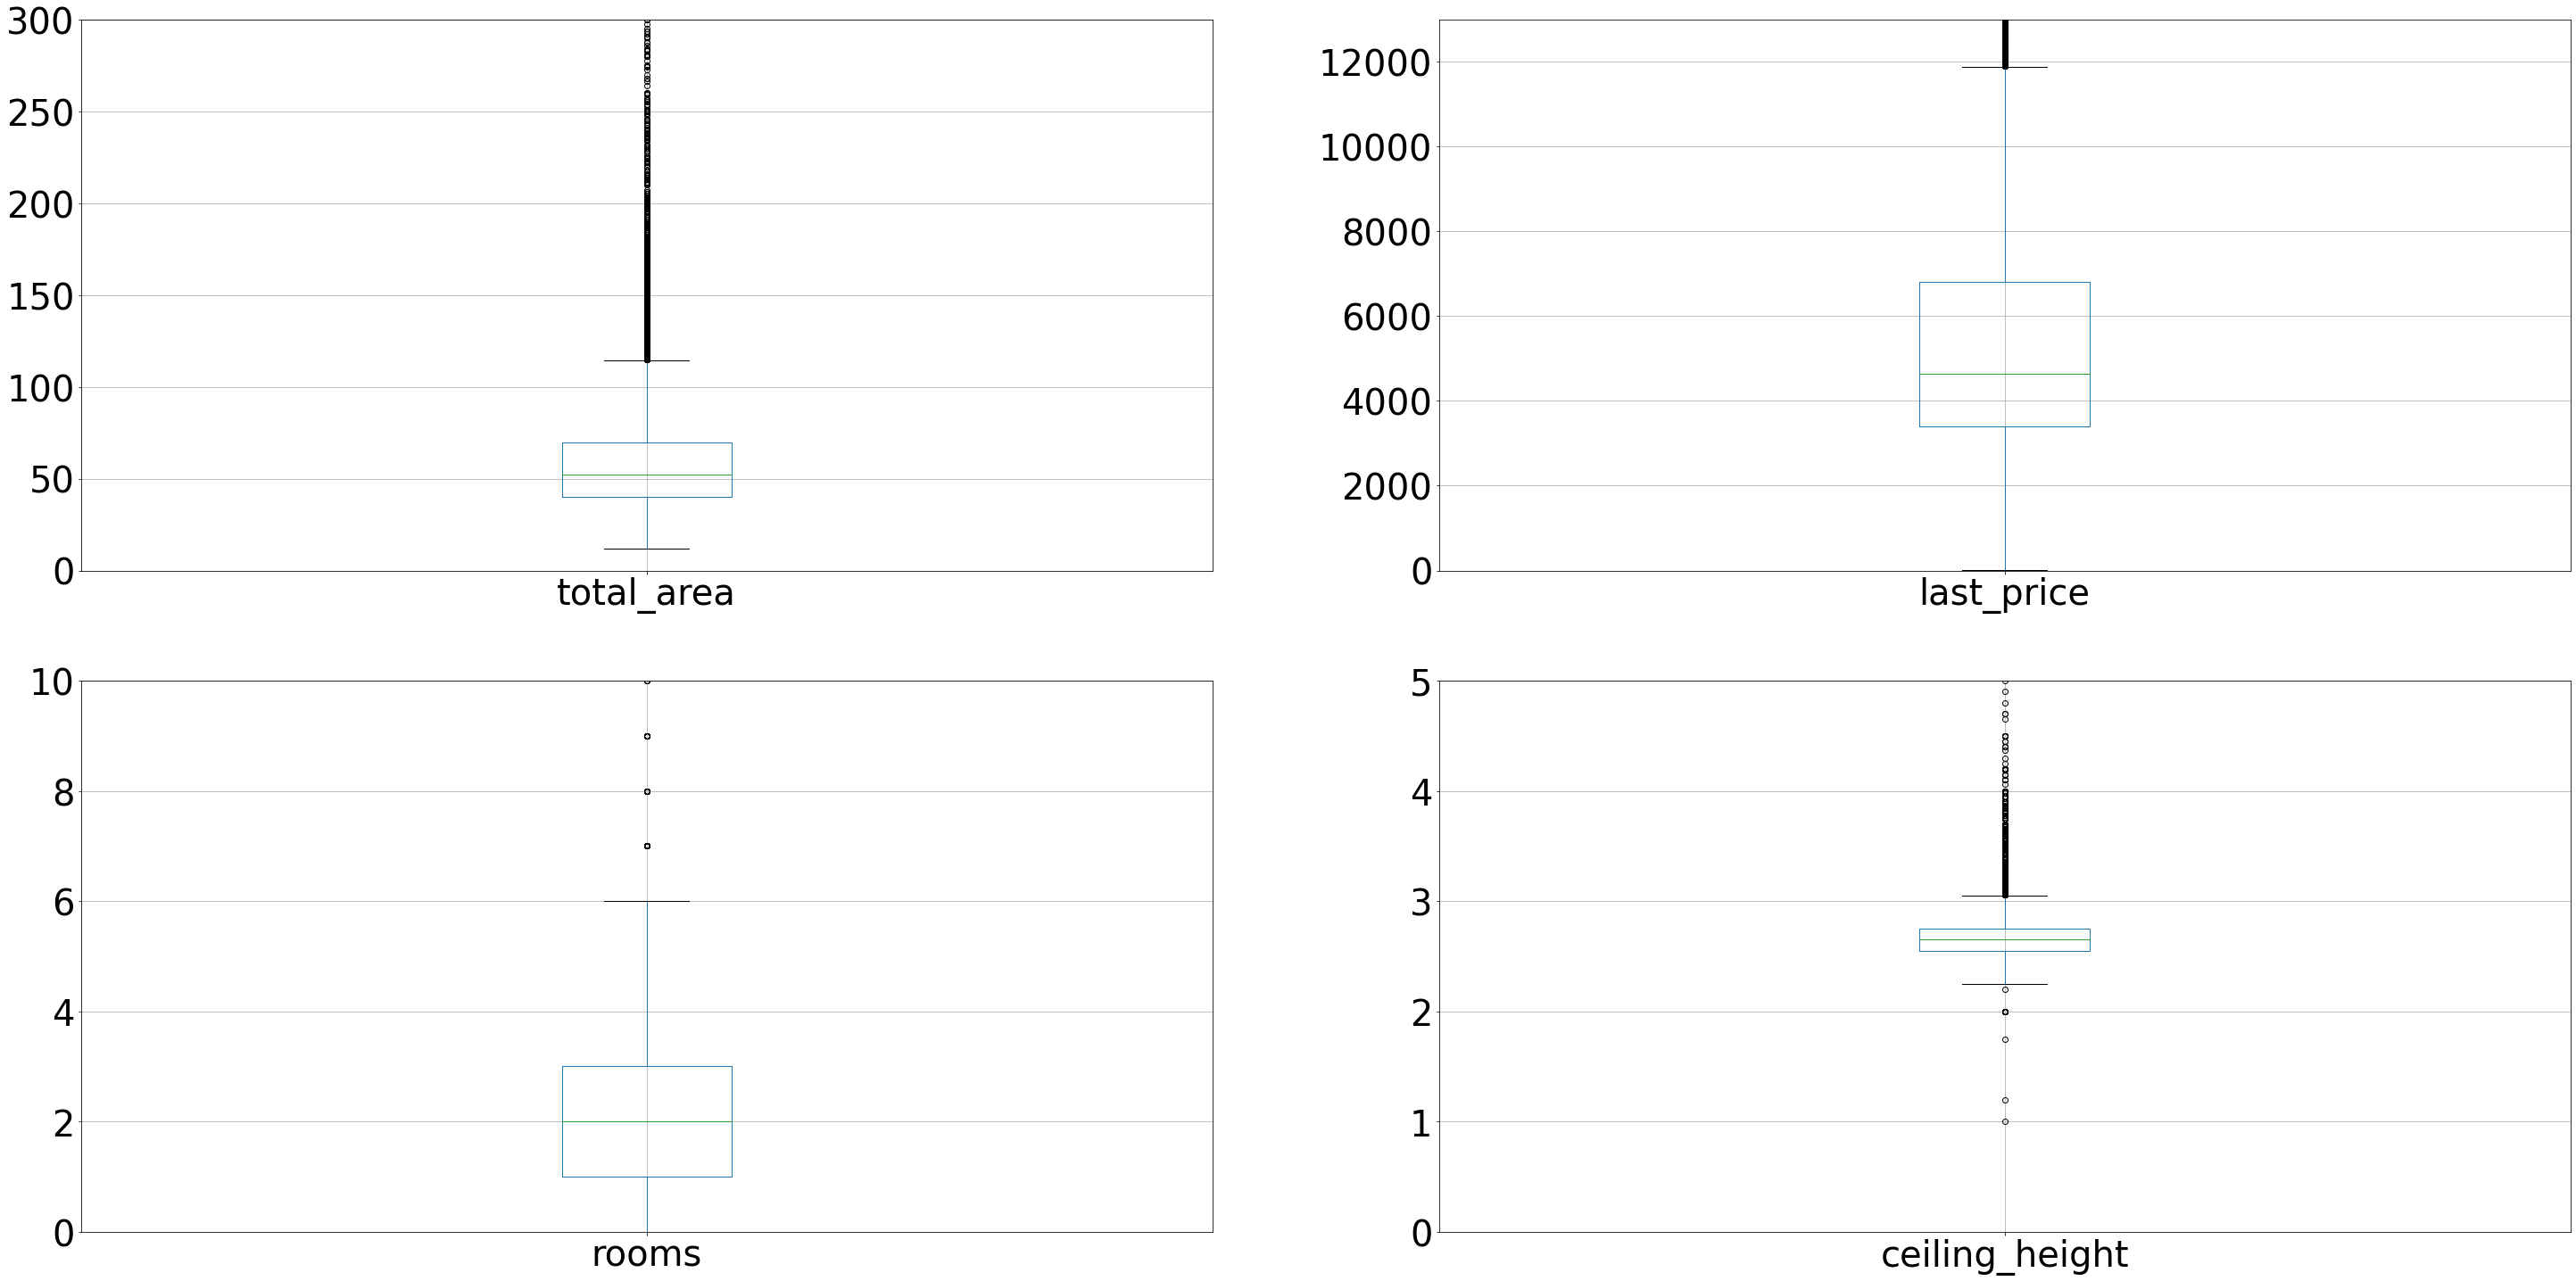

In [53]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [300, 13000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1 
        

Let's define the boundaries and get rid of outliers:
- area: 0-120
- price: 0-12000
- number of rooms: 0-6
- ceiling height: 2.2-3.05

In [54]:
df = df.query('total_area<120')
df = df.query('last_price<12000')
df = df.query('rooms<=6')
df = df.query('2.2<ceiling_height<3.05')
df = df.query('cityCenters_nearest!=0')

In [55]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,20582.000000,20582.000000,20582.000000,20582.000000
mean,52.143074,4723.522002,1.896852,2.653949
std,17.565705,2146.217961,0.884299,0.139432
min,12.000000,12.190000,0.000000,2.250000
25%,38.600000,3299.000000,1.000000,2.550000
50%,48.000000,4300.000000,2.000000,2.600000
75%,62.300000,5800.000000,3.000000,2.750000
max,119.800000,11999.000000,6.000000,3.040000


##### After getting rid of outliers, we  can construct normalized graphs:

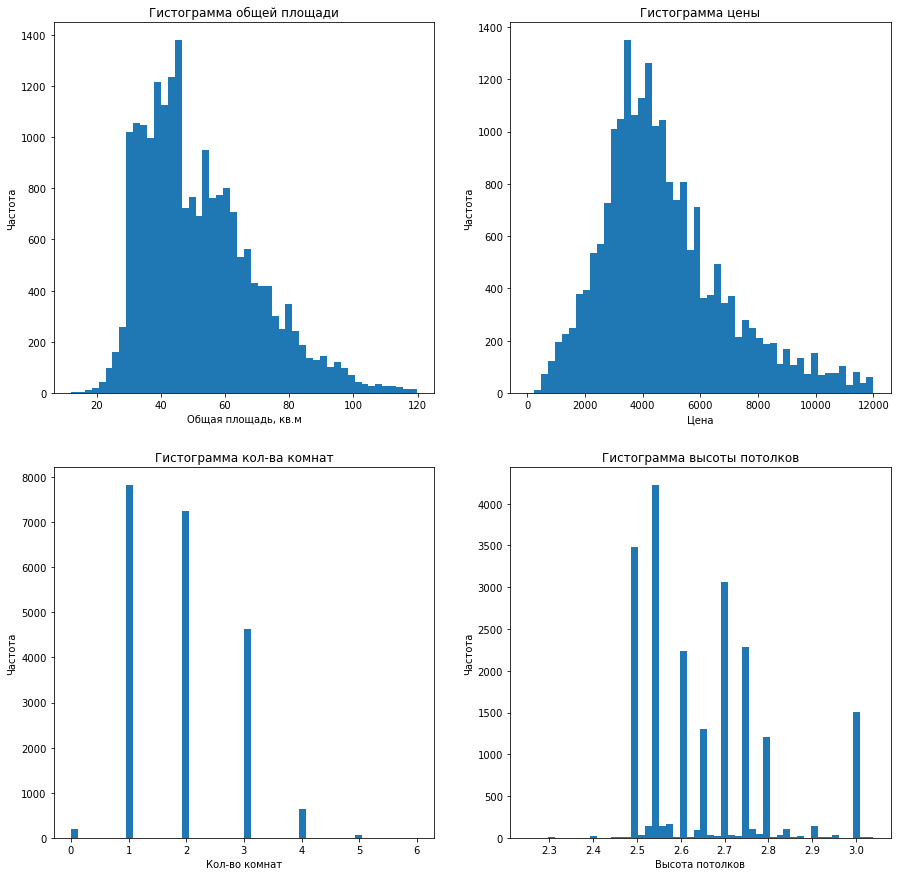

In [56]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
title = ['Гистограмма общей площади', 'Гистограмма цены', 'Гистограмма кол-ва комнат', 'Гистограмма высоты потолков'] 
set_xlabel = ['Общая площадь, кв.м', 'Цена', 'Кол-во комнат', 'Высота потолков']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
for i in range (len(columns)):
    ax_i = df[columns[i]].plot(kind='hist', ax=ax[i//2, (i)%2], bins=50, title=title[i])
    ax_i.set_ylabel('Частота')
    ax_i.set_xlabel(set_xlabel[i])
    

Based on our sample, we can say that:
- The average area of an apartment is 52 sq.m. Values are in the range from 12 to 120 sq.m.
- The average cost of an apartment is 6.5 million rubles (while the median is 4.7 million rubles).
- In a sample of the presented 2-room apartments.
- The average height of the ceilings is 2.7 m.

Built histograms and swing charts, we threw them away and got rid of them.

In [57]:
df['days_exposition'].describe()

count    18145.000000
mean       170.246294
std        208.622458
min          1.000000
25%         43.000000
50%         90.000000
75%        215.000000
max       1580.000000
Name: days_exposition, dtype: float64

According to the table, the average is ~ 170 days, and the median is ~ 90 days. But there is also a value of 1580, which raises doubts. Let's build a histogram and see in more detail.

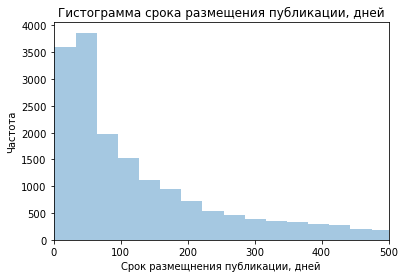

In [58]:
sns.distplot(df['days_exposition'], kde=False, bins=50)
plt.xlim(0, 500)
plt.title('Гистограмма cрока размещения публикации, дней')
plt.xlabel('Срок размещнения публикации, дней')
plt.ylabel('Частота')
plt.show()

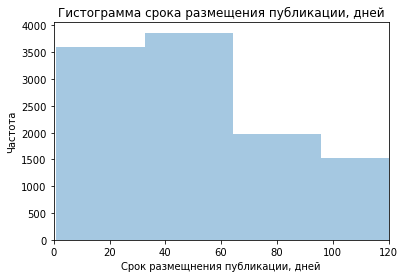

In [59]:
sns.distplot(df['days_exposition'], kde=False, bins=50)
plt.xlim(0, 120)
plt.title('Гистограмма cрока размещения публикации, дней')
plt.xlabel('Срок размещнения публикации, дней')
plt.ylabel('Частота')
plt.show()

We can see from the graph that most ads close within 45 days and 60 days. Only it is still unknown whether the owner is burying the ad or whether it closes automatically.

#### What factors most influence the cost of an apartment?

Let's calculate the price dependencies:
- from the square,
- the number of rooms,
- distance from the center.

Let's study the dependence of the price on the floor on which the apartment is located:
- first,
- the last,
- a friend.

Let's study the dependence on the date of placement: day of the week, month and year.

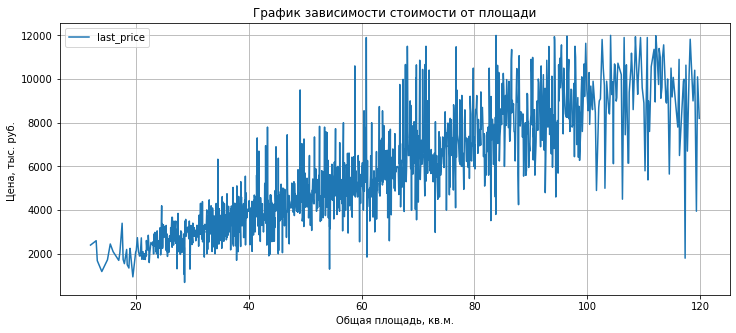

In [60]:
df.pivot_table(index='total_area', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5))
plt.title('График зависимости стоимости от площади')
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Цена, тыс. руб. ')
plt.show()

There is a strong interdependence. This means that with an increase in the area of a flat, its cost also increases.

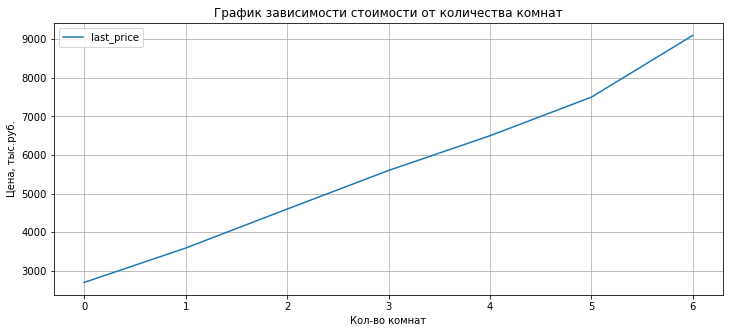

In [61]:
df.pivot_table(index='rooms', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5)) 
plt.title('График зависимости стоимости от количества комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена, тыс.руб.')
plt.show()

The graph shows the dependence of the cost on the number of rooms. More rooms - higher cost.

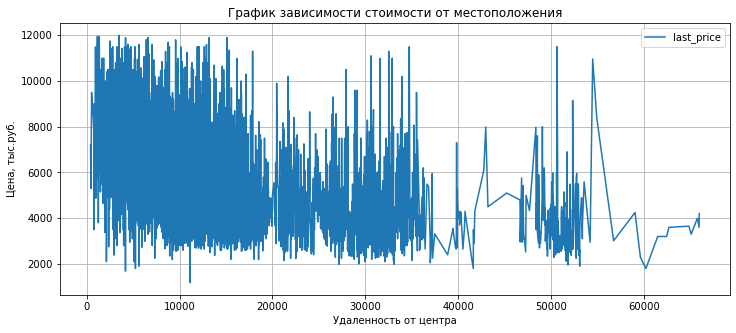

In [62]:
df.pivot_table(index='cityCenters_nearest', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5)) 
plt.title('График зависимости стоимости от местоположения')
plt.xlabel('Удаленность от центра')
plt.ylabel('Цена, тыс.руб.')
plt.show()

Very weak dependence of cost on distance from the center.

In [63]:
df.pivot_table(index='floor_entity', values='last_price',aggfunc='median').sort_values(by = 'last_price', ascending = False)

,last_price
floor_entity,
другой,4500.0
последний,3900.0
первый,3750.0


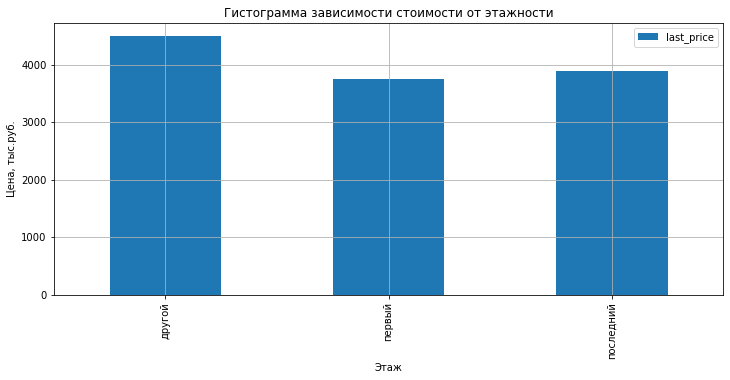

In [64]:
df.pivot_table(index='floor_entity', values='last_price',aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5))  
plt.title('Гистограмма зависимости стоимости от этажности')
plt.xlabel('Этаж')
plt.ylabel('Цена, тыс.руб.')
plt.show()

We see that the cost of an apartment on the first floor differs significantly from the cost of an apartment on other floors, while the cost of an apartment on the top floor is also lower than the cost of apartments on other floors.

In [65]:
df.sort_values(by='weekday_exposition').pivot_table(index='weekday_exposition', values='last_price',aggfunc='median')

,last_price
weekday_exposition,
1 - понедельник,4300.0
2 - вторник,4350.0
3 - среда,4350.0
4 - четверг,4300.0
5 - пятница,4300.0
6 - суббота,4300.0
7 - воскресенье,4350.0


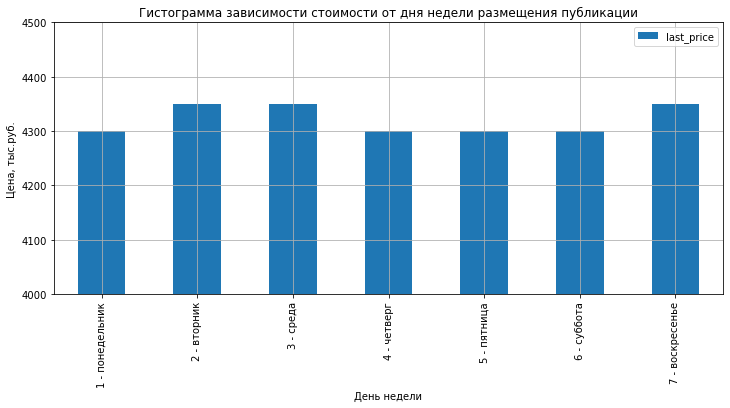

In [66]:
(df
     .sort_values(by='weekday_exposition')
     .pivot_table(index='weekday_exposition', values='last_price',aggfunc='median')
     .plot(kind='bar',grid=True, figsize=(12, 5), ylim=(4000,4500)))
plt.title('Гистограмма зависимости стоимости от дня недели размещения публикации')
plt.xlabel('День недели')
plt.ylabel('Цена, тыс.руб.')
plt.show()

In [67]:
df.sort_values(by='month_exposition').pivot_table(index='month_exposition', values='last_price',aggfunc='median')

,last_price
month_exposition,
1,4300.0
2,4300.0
3,4350.0
4,4500.0
5,4290.0
6,4150.0
7,4255.0
8,4299.0
9,4300.0


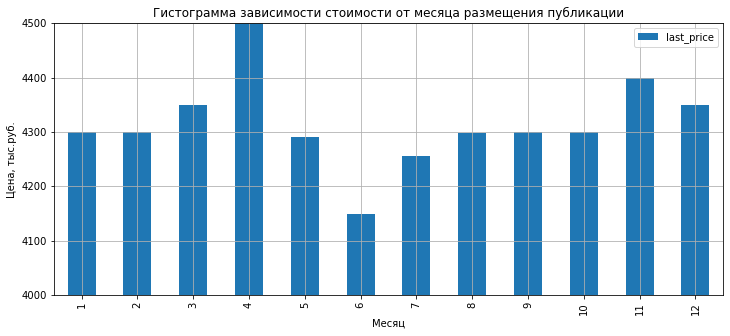

In [68]:
(df
     .sort_values(by='month_exposition')
     .pivot_table(index='month_exposition', values='last_price',aggfunc='median')
     .plot(kind='bar',grid=True, figsize=(12, 5), ylim=(4000,4500)))
plt.title('Гистограмма зависимости стоимости от месяца размещения публикации')
plt.xlabel('Месяц')
plt.ylabel('Цена, тыс.руб.')
plt.show()


In [69]:
df.sort_values(by='year_exposition').pivot_table(index='year_exposition', values='last_price',aggfunc='median')

,last_price
year_exposition,
2014,5360.0
2015,4700.0
2016,4200.0
2017,4200.0
2018,4300.0
2019,4700.0


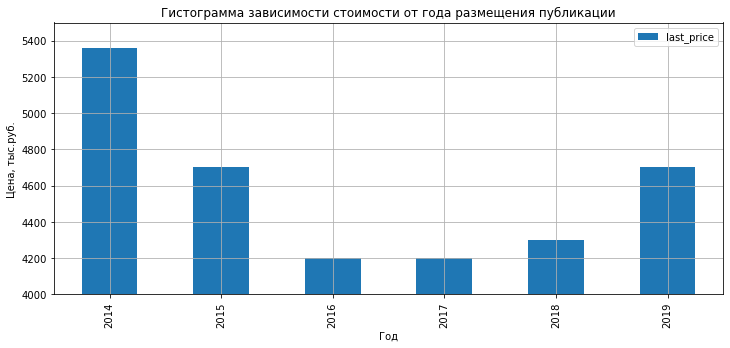

In [70]:
(df
     .sort_values(by='year_exposition')
     .pivot_table(index='year_exposition', values='last_price',aggfunc='median')
     .plot(kind='bar',grid=True, figsize=(12, 5), ylim=(4000,5500)))
plt.title('Гистограмма зависимости стоимости от года размещения публикации')
plt.xlabel('Год')
plt.ylabel('Цена, тыс.руб.')
plt.show()

The dependence of the cost on the day of the week is weak. We can say that on Tuesday, Wednesday and Sunday the most ads are published and the price is set high. By the end of the week (Friday and Saturday), the price decreases slightly.

The highest real estate prices were revealed in April. Then there is a decline in the settlement and a small jump in August. Since September, we have seen stable growth and decline in December. We can talk about the seasonality in the real estate market: the beginning of summer and December is fading away, and September begins to rise, which can be associated with the influx of people moving (those who decided to change the city, area of ​​residence).

On the graph of the cost from the visible year, 2014 clearly stands out. In 2016-2017, the situation is identical. Starting from 2018, we see an increase in value.
Let's take a closer look at 2014.

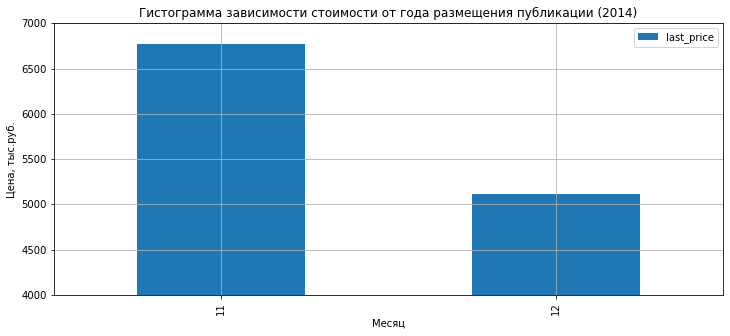

In [71]:
(df
     .query('year_exposition == 2014')
     .pivot_table(index='month_exposition', values='last_price',aggfunc='median')
     .plot(kind='bar',grid=True, figsize=(12, 5), ylim=(4000,7000)))
plt.title('Гистограмма зависимости стоимости от года размещения публикации (2014)')
plt.xlabel('Месяц')
plt.ylabel('Цена, тыс.руб.')
plt.show()

In [72]:
df1 = df[['last_price','total_area','rooms','cityCenters_nearest', 'floors_total', 'weekday_exposition', 'month_exposition', 'year_exposition']]

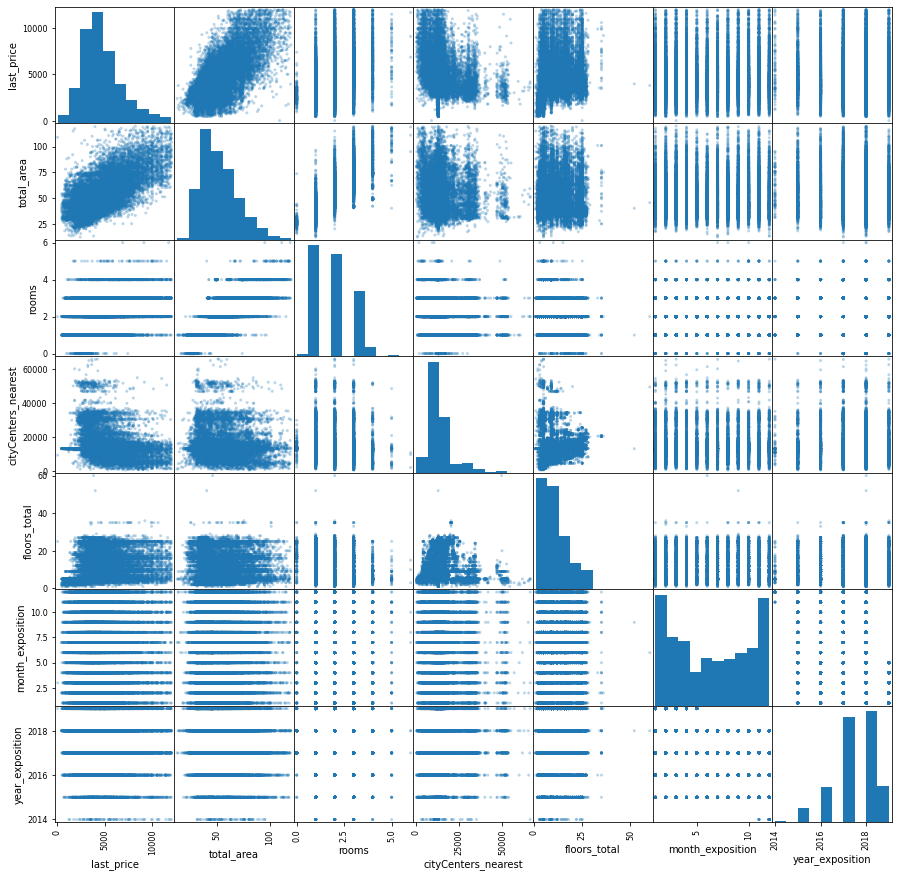

In [73]:
pd.plotting.scatter_matrix(df1, 
                           figsize=(15,15), alpha = 0.3)
plt.show()

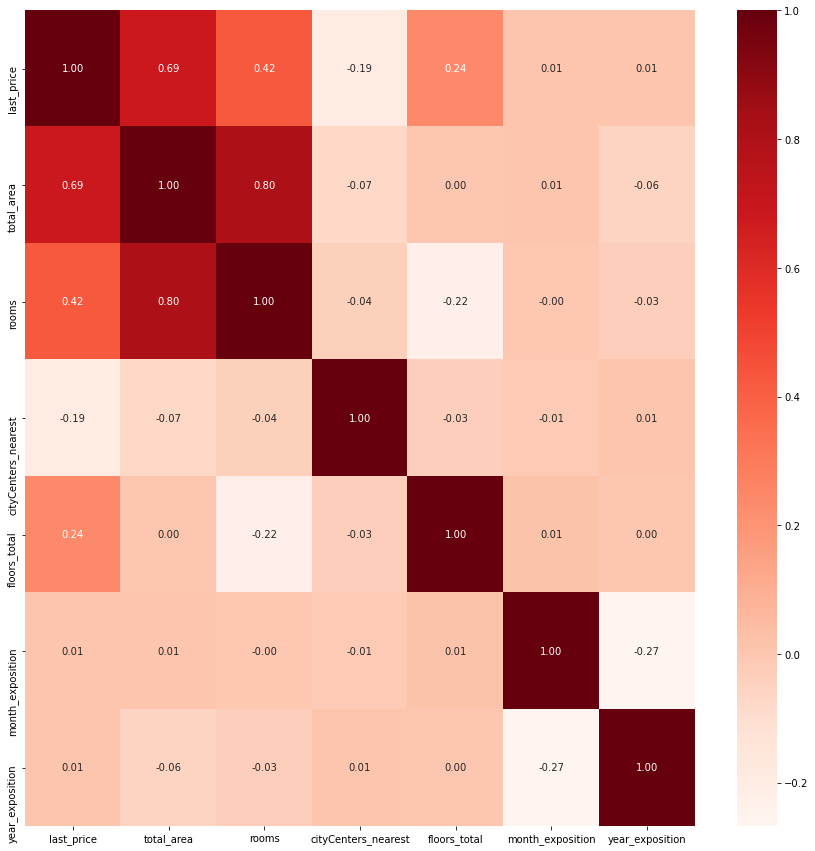

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True, cmap="Reds", fmt='.2f')  
plt.show()

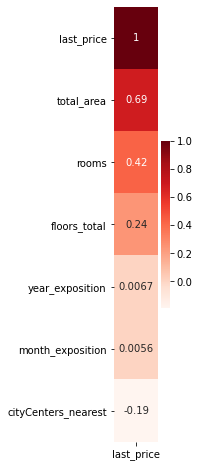

In [75]:
plt.figure(figsize=(1,8))
sns.heatmap(df1.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Reds", 
            annot=True, annot_kws={'size':10})
plt.show()

##### As we can see from the heatmap, the cost is most influenced by the area, the least - the location (proximity to the city center).

Let's choose 10 settlements with the largest number of ads. Let's calculate the average price per square meter in these settlements. Let's single out the settlements with the highest and lowest housing costs.

In [76]:
top10 = df.pivot_table(index='locality_name', values='price_sqm',aggfunc=('count', 'mean')).sort_values(('count'),ascending=False).head(10)
top10

,count,mean
locality_name,,
Санкт-Петербург,12904,105.227694
посёлок Мурино,518,85.640637
посёлок Шушары,437,78.639931
Всеволожск,386,67.088938
посёлок Парголово,325,90.292031
Пушкин,325,100.116031
Колпино,324,75.318272
деревня Кудрово,298,92.409899
Гатчина,293,68.431126


In [77]:
top10.query('mean==mean.max()|mean==mean.min()')

,count,mean
locality_name,,
Санкт-Петербург,12904,105.227694
Выборг,217,57.887005


In [78]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest']/1000).round()

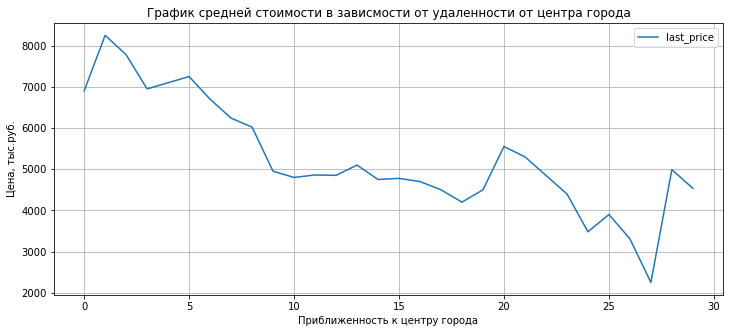

In [79]:
df.query('locality_name=="Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5)) 
plt.title('График средней стоимости в зависмости от удаленности от центра города')
plt.xlabel('Приближенность к центру города')
plt.ylabel('Цена, тыс.руб.')
plt.show()

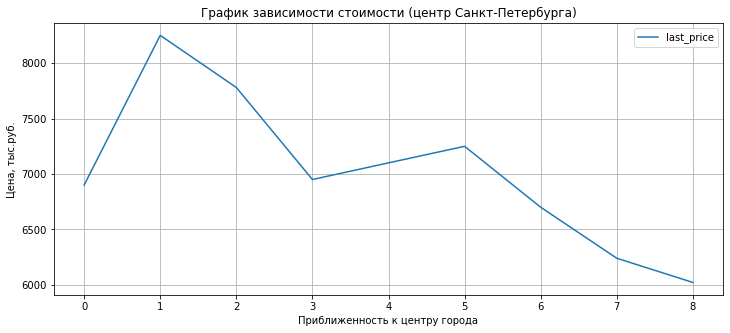

In [80]:
df.query('locality_name=="Санкт-Петербург" & cityCenters_nearest_km<=8').pivot_table(index='cityCenters_nearest_km', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5)) 
plt.title('График зависимости стоимости (центр Санкт-Петербурга)')
plt.xlabel('Приближенность к центру города')
plt.ylabel('Цена, тыс.руб.')
plt.show()




We see changes in the schedule after a distance of 1-8 km. from the center, thus we can conclude that the central zone is within a radius of up to 8 km. 

We will analyze and study the following parameters for real estate in the center of St. Petersburg: area, price, number of rooms, ceiling height and their relationship. To do this, we will use the describe () method, build a scatterplot, and calculate the correlation matrix.

In [81]:
df.query('locality_name=="Санкт-Петербург" & cityCenters_nearest_km<=8')[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,2095.000000,2095.000000,2095.000000,2095.000000
mean,61.640859,7057.233001,2.167064,2.758912
std,20.867570,2236.733957,0.947910,0.182797
min,12.000000,1600.000000,0.000000,2.400000
25%,45.000000,5350.000000,1.000000,2.550000
50%,59.700000,6800.000000,2.000000,2.750000
75%,75.700000,8655.000000,3.000000,3.000000
max,119.000000,11999.000000,6.000000,3.040000


In [82]:
spb_cntr = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8')

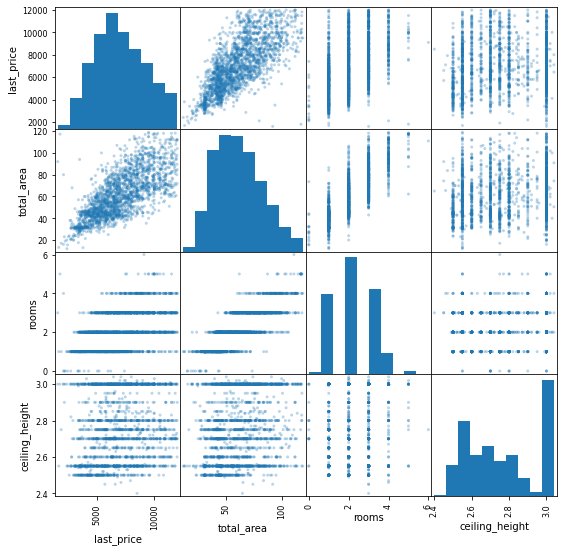

In [83]:
pd.plotting.scatter_matrix(spb_cntr.loc[:,['last_price','total_area','rooms','ceiling_height']], 
                           figsize=(9, 9), alpha = 0.3)
plt.show()

In [84]:
spb_cntr.loc[:,['last_price','total_area','rooms','ceiling_height']].corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.716997,0.459994,0.162954
total_area,0.716997,1.000000,0.805616,0.224035
rooms,0.459994,0.805616,1.000000,0.172146
ceiling_height,0.162954,0.224035,0.172146,1.000000


Judging by the correlation matrix, we can say the following:
- the cost strongly depends on the area of the apartment, but the relationship between the number of rooms and the cost is weaker. So the area is still more important,
- there is an obvious connection between the area and the number of rooms,
- the height of the ceilings practically does not affect the cost. 

In [85]:
spb_cntr.pivot_table(index='floor_entity', values='last_price',aggfunc='median')

,last_price
floor_entity,
другой,7000.0
первый,5700.0
последний,6800.0


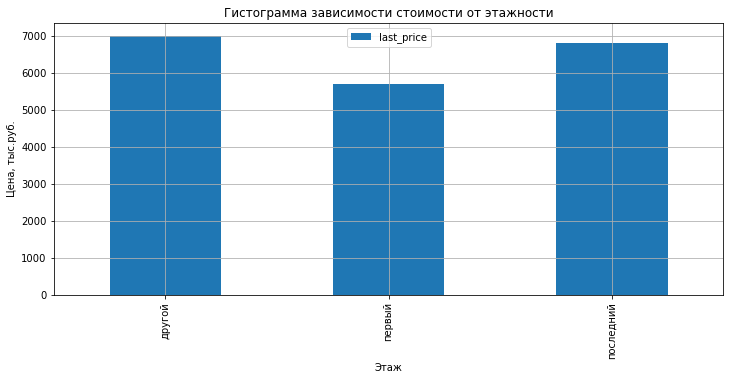

In [86]:
spb_cntr.pivot_table(index='floor_entity', values='last_price',aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5)) 
plt.title('Гистограмма зависимости стоимости от этажности')
plt.xlabel('Этаж')
plt.ylabel('Цена, тыс.руб.')
plt.show()




As expected, the cost of an apartment on the ground floor is lower than on the top or other floors. On the top floor, the cost is slightly lower than on other floors.

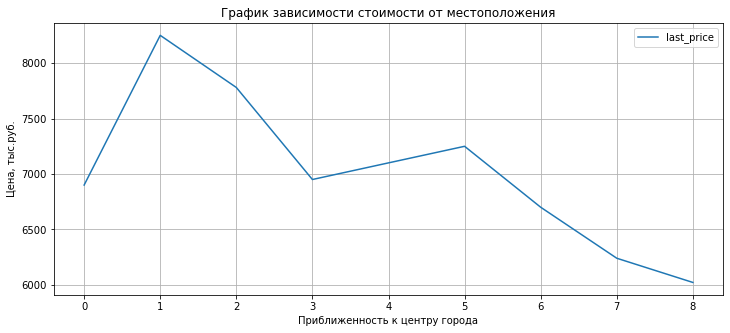

In [87]:
df.query('locality_name=="Санкт-Петербург" & cityCenters_nearest_km<=8').pivot_table(index='cityCenters_nearest_km', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5)) 
plt.title('График зависимости стоимости от местоположения')
plt.xlabel('Приближенность к центру города')
plt.ylabel('Цена, тыс.руб.')
plt.show()


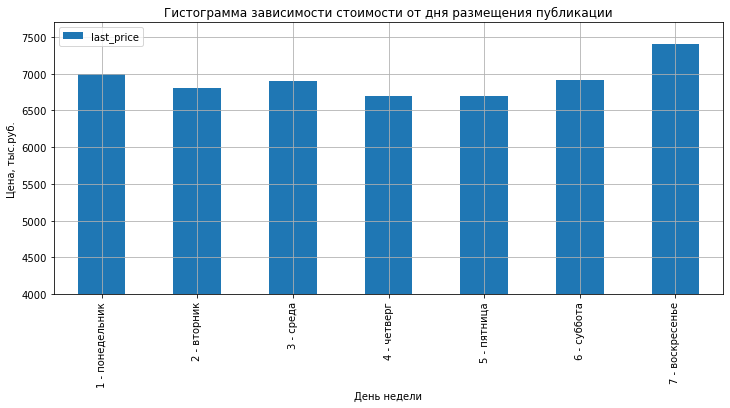

In [88]:
df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8').pivot_table(index='weekday_exposition', values='last_price',aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5), ylim=(4000,7700))
plt.title('Гистограмма зависимости стоимости от дня размещения публикации')
plt.xlabel('День недели')
plt.ylabel('Цена, тыс.руб.')   
plt.show()

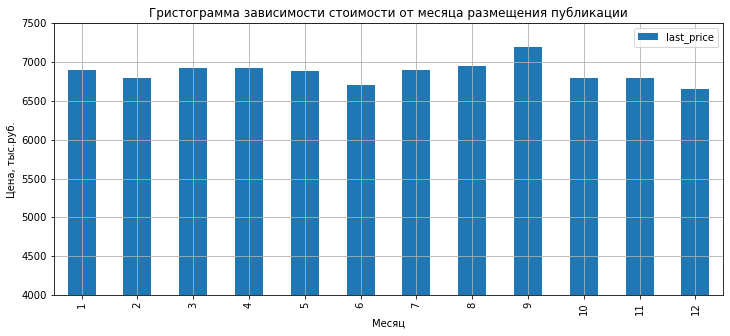

In [89]:
df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8').pivot_table(index='month_exposition', values='last_price',aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5), ylim=(4000,7500))
plt.title('Гристограмма зависимости стоимости от месяца размещения публикации')
plt.xlabel('Месяц')
plt.ylabel('Цена, тыс.руб.')
plt.show()

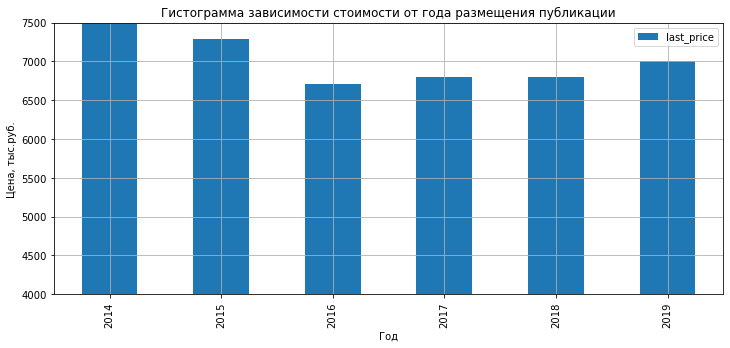

In [90]:
df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8').pivot_table(index='year_exposition', values='last_price',aggfunc='median').plot(kind='bar',grid=True, figsize=(12, 5), ylim=(4000,7500))
plt.title('Гистограмма зависимости стоимости от года размещения публикации')
plt.xlabel('Год')
plt.ylabel('Цена, тыс.руб.')
plt.show()

- As we can see, on weekdays the market situation is more or less stable, the value of real estate practically does not change; on Thursday and Friday we may see a slight decline, but on weekends it will rise. I would associate this with the fact that, most likely, the agent is engaged in the sale and he is interested in the early sale and is engaged in this even on weekends. Increasing the value at the weekend hopes that with the beginning of the new week there will be new views and the circle of interested will increase.
 
- On the chart, broken down by months, the situation repeats: in the spring the price starts to grow, then closer to the summer there is a slight decline, the fall - as we understand it, is the most profitable time to sell. And closer to winter, the decline begins again.

- On the annual chart, we again observe that 2014 is knocked out. The most successful was 2015.From 2016 to 2017 there is a slight decline and an increase in 2018-2019.

### Overall conclusion

The provided data was processed and analyzed: missing values ​​were replaced, new ones added, data type changed. In the course of the study, the data were cleared of out-of-order values, histograms and graphs were built, and the main indicators were calculated. Allocated the center of St. Petersburg (radius up to 8 km.).
After conducting the research, we can draw the following conclusions:
- The sample includes apartments up to 120 sq.m. For the center of St. Petersburg the average area is 60 sq.m., and for the rest of the city - 52 sq.m.
- The average cost of an apartment in the city center is about 7 million rubles, and in the rest of 4.7 million.
- There are more apartments with high ceilings in the city center than in other areas of the city.
- The cost strongly depends on the area of ​​the apartment, but the relationship between the number of rooms and the cost is weaker. So the area is still more important.
- The height of the ceilings practically does not affect the cost.
- The most expensive apartments within a radius of up to 1 km. from the center.
- Apartments on the first floors are the cheapest, on the top floor they are also slightly lower than on the others.
- In spring and autumn, the cost of apartments is higher, itself in the rest of the year. Closer to the summer and towards the end of the year, there is a decrease, which I would associate with the period of holidays and New Year's holidays.
- Little data has been provided for 2014, so it is difficult to fully analyze this year.
- For the rest of the periods, we can say that 2015 is the most successful, and in 2016-2017 there is a decline. Since 2019, we have seen a rise in prices.
